In [3]:
import os
import glob
import numpy as np
import pandas as pd

# Fetch the number of images using glob or some other path analyzer
N = len(glob.glob("/content/sample_data/static/*.jpg"))

# Find the root directory of your app to generate the image URL for the bokeh server
ROOT = os.path.split(os.path.abspath("."))[1] + "/"

# Number of bins per color for the 3D color histograms
N_BINS_COLOR = 16
# Number of bins per channel for the channel histograms
N_BINS_CHANNEL = 50

print('lenghth of images', N, ROOT)

lenghth of images 8 content/


In [4]:
# Define an array containing the 3D color histograms. We have one histogram per image each having N_BINS_COLOR^3 bins.
# i.e. an N * N_BINS_COLOR^3 array
#  1 image = 4096 bins -> color histogram
color_histogram_ar = []
for i in range(N):
  img_histogram = np.zeros(pow(N_BINS_COLOR,3))
  color_histogram_ar.append(img_histogram) 

color_histogram = np.array(color_histogram_ar)
color_histogram.shape, len(color_histogram[0]), len(color_histogram)


((8, 4096), 4096, 8)

In [5]:
# Define an array containing the channel histograms, there is one per image each having 3 channel and N_BINS_CHANNEL
# bins i.e an N x 3 x N_BINS_CHANNEL array
# 1 image= 3 (channels) * 50 (bins per channel)

channel_histogram_ar = []
for i in range(N):
  img_histogram_channel = np.zeros(N_BINS_CHANNEL * 3)
  channel_histogram_ar.append(img_histogram_channel) 

channel_histogram = np.array(channel_histogram_ar)
channel_histogram.shape, len(channel_histogram[0]), len(channel_histogram)

((8, 150), 150, 8)

In [6]:
# initialize an empty list for the image file paths

img_file_path = []

(288, 640, 3) /content/sample_data/static/1_5_Automatic_0_0_0.jpg
(184320, 3)
(4096,)
[1238    0    0 ...    0    0 5287]
0 r
1 g
2 b


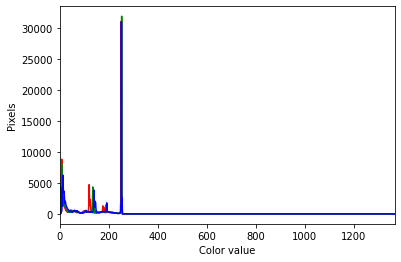

0 r
1 g
2 b


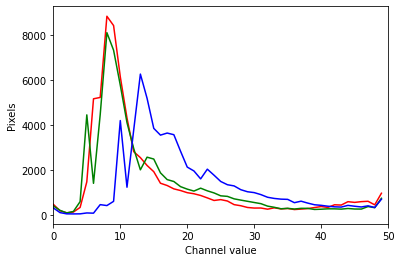

(288, 640, 3) /content/sample_data/static/1_3_Manual_0_0_0.jpg
(184320, 3)
(4096,)
[381   0   0 ...   0   0 217]
0 r
1 g
2 b


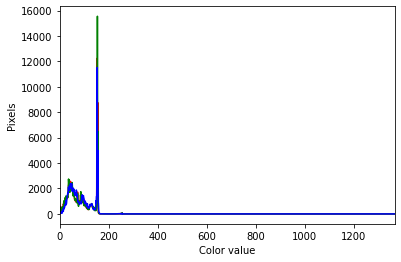

0 r
1 g
2 b


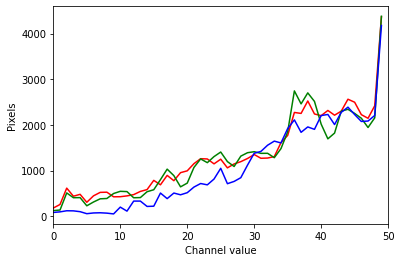

(288, 640, 3) /content/sample_data/static/1_3_Automatic_0_0_0.jpg
(184320, 3)
(4096,)
[111265      0      0 ...      0      0   3002]
0 r
1 g
2 b


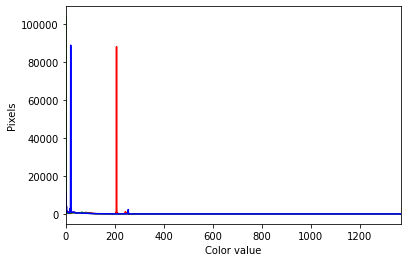

0 r
1 g
2 b


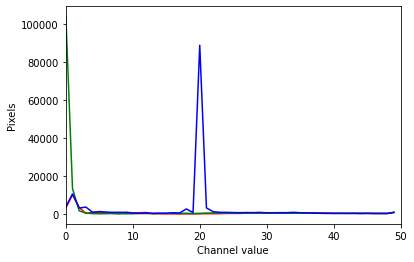

(288, 640, 3) /content/sample_data/static/1_4_Automatic_0_0_0.jpg
(184320, 3)
(4096,)
[1349    0    0 ...    0    0 4372]
0 r
1 g
2 b


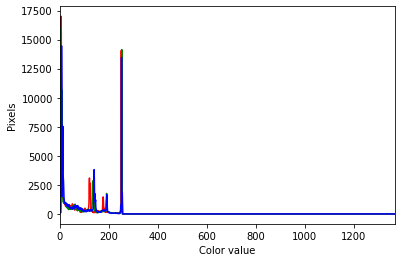

0 r
1 g
2 b


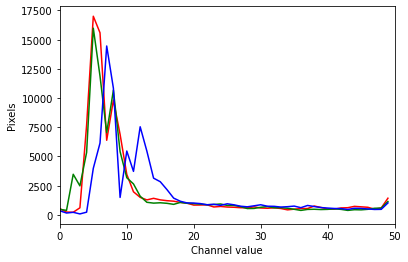

(288, 640, 3) /content/sample_data/static/1_1_Automatic_0_0_0.jpg
(184320, 3)
(4096,)
[3939    0    0 ...    0    0    1]
0 r
1 g
2 b


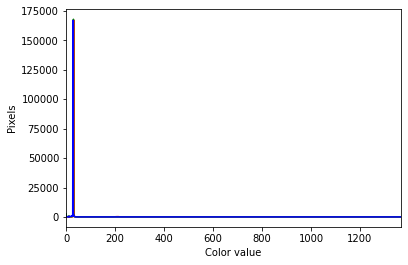

0 r
1 g
2 b


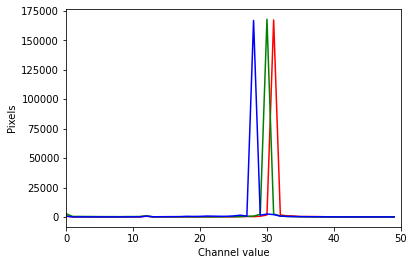

(288, 640, 3) /content/sample_data/static/1_4_Manual_0_0_0.jpg
(184320, 3)
(4096,)
[ 4245     0     0 ...     0     0 37102]
0 r
1 g
2 b


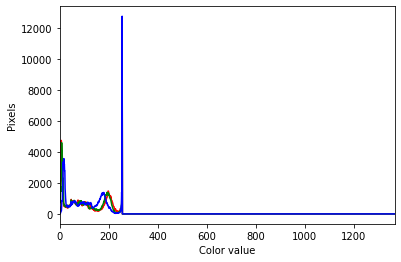

0 r
1 g
2 b


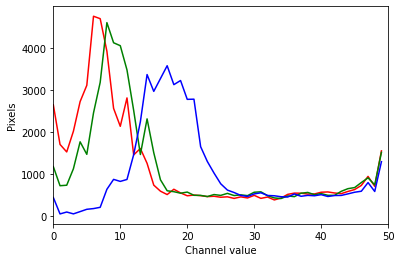

(288, 640, 3) /content/sample_data/static/1_2_Manual_0_0_0.jpg
(184320, 3)
(4096,)
[1193    0    0 ...    0    0  370]
0 r
1 g
2 b


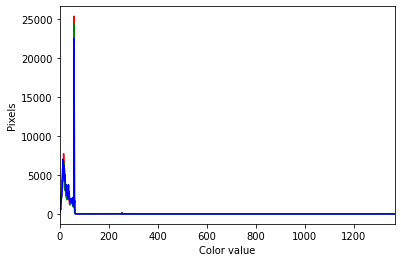

0 r
1 g
2 b


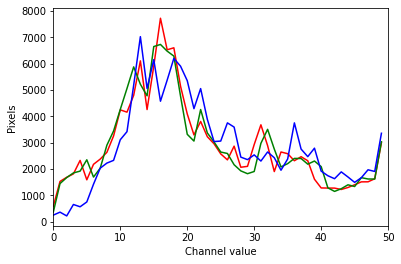

(288, 640, 3) /content/sample_data/static/1_2_Automatic_0_0_0.jpg
(184320, 3)
(4096,)
[1807    0    0 ...    0    0    1]
0 r
1 g
2 b


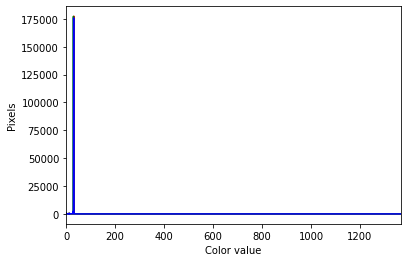

0 r
1 g
2 b


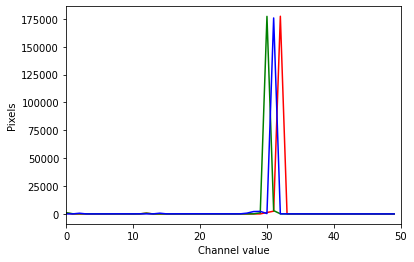

In [7]:
from PIL import Image
from matplotlib import pyplot as plt

# Compute the color and channel histograms
for idx, f in enumerate(glob.glob("/content/sample_data/static/*.jpg")):
    # open image using PILs Image package
    im = Image.open(f) #opens up an image and digital file format can be retrieved as well as pixel format

    # Convert the image into a numpy array and reshape it such that we have an array with the dimensions (N_Pixel, 3)
    im_ar = np.asarray(im) #h*w*RGB = 280*640*3
    print(im_ar.shape,f)
    im_pixel = im_ar.reshape(im_ar.shape[0] * im_ar.shape[1], 3) #(184320, 3)#To reshape it to flat array with pixels which have three values (R,G,B)
    print(im_pixel.shape)
    # Compute a multi dimensional histogram for the pixels, which returns a cube
    # reference: https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html
    img_H, img_color_edges=np.histogram(im_pixel, bins=pow(N_BINS_COLOR,3))
    print(img_H.shape) #(4096,)
    print(img_H)

    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)

    # plot each color
    plt.xlim([0, 1367])
    for channel_id, c in zip(channel_ids, colors):
        print(channel_id,c)
        histogram, bin_edges = np.histogram(
            im_ar[:, :, channel_id], bins=1367, range=(0, 1367)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.xlabel("Color value")
    plt.ylabel("Pixels")

    plt.show()
    
    # However, later used methods do not accept multi dimensional arrays, so reshape it to only have columns and rows
    # (N_Images, N_BINS^3) and add it to the color_histograms array you defined earlier
    # reference: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    img_color_histogram_arr = img_H.reshape(1, pow(N_BINS_COLOR,3)) 
    color_histogram[idx] = img_color_histogram_arr

    # Append the image url to the list for the server
    img_file_path.append(f)

    # Compute a "normal" histogram for each color channel (rgb)
    # reference: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    channel_hist, channel_bin_edges = np.histogram(im_pixel, bins=(N_BINS_CHANNEL*3))
    # and add them to the channel_histograms
    channel_histogram[idx]=channel_hist

    # plot each channel
    plt.xlim([0, N_BINS_CHANNEL])
    for channel_id, c in zip(channel_ids, colors):
        print(channel_id,c)
        histogram, bin_edges = np.histogram(
            im_ar[:, :, channel_id], bins=N_BINS_CHANNEL, range=(0, N_BINS_CHANNEL)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.xlabel("Channel value")
    plt.ylabel("Pixels")

    plt.show()
    
    

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

# Calculate the indicated dimensionality reductions
# references:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

image_df = pd.DataFrame([])
for path in img_file_path:
 img = Image.open(path)
 im_ar = np.asarray(img) #3d array 288*640*3 
 img_flat_1d = im_ar.ravel() #ravel returns flatten array, 1d
#print('1d image array: ',img_flat_1d,img_flat_1d.shape,im_ar.shape) #(552960,) (288, 640, 3)
 img_flat_1d = img_flat_1d / 255
 flatten_img = pd.Series(img_flat_1d,name=path) 
 image_df = image_df.append(flatten_img)

print(image_df.shape)

#PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
# image_df_pca = PCA(n_components=0.8)
image_df_pca = PCA(n_components=image_df.shape[0])
pca_result = image_df_pca.fit(image_df)

# Store results of PCA in a data frame
pca_df=pd.DataFrame(image_df_pca.transform(image_df), columns=['PCA%i' % i for i in range(image_df.shape[0])], index=image_df.index)
print('PCA Result... ',pca_result, 'Result', pca_df)
print('Explained variation per principal component: {}'.format(pca_result.explained_variance_ratio_))

# TSNE
tsne = TSNE(n_components=3,verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(image_df)
print('TSNE results', tsne_results)

tsne_df = pd.DataFrame({'TSNE0':tsne_results[:,0],
                        'TSNE1':tsne_results[:,1],
                        'TSNE2':tsne_results[:,2]}, index=image_df.index)

result_df = pd.concat([pca_df, tsne_df], axis=1)
result_df.index.name = 'IMAGEURL'

result_df

(8, 552960)
PCA Result...  PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) Result                                                           PCA0  ...          PCA7
/content/sample_data/static/1_5_Automatic_0_0_0...  226.182855  ...  1.845696e-12
/content/sample_data/static/1_3_Manual_0_0_0.jpg      9.593804  ...  2.170285e-12
/content/sample_data/static/1_3_Automatic_0_0_0...  -77.351191  ...  3.970891e-13
/content/sample_data/static/1_4_Automatic_0_0_0...   78.216308  ...  1.978376e-12
/content/sample_data/static/1_1_Automatic_0_0_0... -129.726302  ...  8.282924e-13
/content/sample_data/static/1_4_Manual_0_0_0.jpg    135.810216  ...  8.566353e-12
/content/sample_data/static/1_2_Manual_0_0_0.jpg   -116.622283  ... -8.862932e-12
/content/sample_data/static/1_2_Automatic_0_0_0... -126.103408  ... -6.922199e-12

[8 rows x 8 columns]
Explained variation per principal component: [4.39964543e-01 2.19622743e-01 1.66902266e

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,TSNE0,TSNE1,TSNE2
IMAGEURL,,,,,,,,,,,
/content/sample_data/static/1_5_Automatic_0_0_0.jpg,226.182855,-68.525124,36.418052,-102.962262,-19.305498,0.767405,-0.239830,1.845696e-12,38.766602,2.356817,-83.723312
/content/sample_data/static/1_3_Manual_0_0_0.jpg,9.593804,-20.269064,-45.393909,-1.127009,117.250604,-8.292342,1.815023,2.170285e-12,-80.501015,-33.508224,-34.486145
/content/sample_data/static/1_3_Automatic_0_0_0.jpg,-77.351191,92.359891,181.933272,3.468699,13.446300,2.516864,-0.470758,3.970891e-13,-61.534466,29.434475,12.776509
/content/sample_data/static/1_4_Automatic_0_0_0.jpg,78.216308,-123.584711,27.610266,128.063026,-21.209825,-0.945879,-0.049956,1.978376e-12,-3.636522,7.237178,69.706947
/content/sample_data/static/1_1_Automatic_0_0_0.jpg,-129.726302,-12.250272,-34.725785,-24.707707,-34.700860,-28.826666,-15.265134,8.282924e-13,7.173799,-19.134186,-12.538439
/content/sample_data/static/1_4_Manual_0_0_0.jpg,135.810216,182.945239,-79.529832,38.856995,-21.110759,1.854755,-0.330984,8.566353e-12,214.973007,-146.931061,300.357300
/content/sample_data/static/1_2_Manual_0_0_0.jpg,-116.622283,-33.885542,-50.266802,-18.613329,-2.952380,35.358575,-10.258476,-8.862932e-12,13.517241,-17.634684,-239.972305
/content/sample_data/static/1_2_Automatic_0_0_0.jpg,-126.103408,-16.790418,-36.045262,-22.978413,-31.417582,-2.432711,24.800115,-6.922199e-12,-40.652374,-17.135120,-104.745033


In [11]:
from bokeh.io import curdoc, show
from bokeh.models import ColumnDataSource, Grid, ImageURL, LinearAxis, Plot, Range1d
from bokeh.plotting import figure, show, output_notebook, save

output_notebook()

source = ColumnDataSource(result_df)

xdr = Range1d(start=-100, end=200)
ydr = Range1d(start=-100, end=200)

plot = Plot(
    title=None, x_range=xdr, y_range=ydr, plot_width=300, plot_height=300,
    min_border=0, toolbar_location=None)

# for path in img_file_path:
  # plot.add_glyph(source, ImageURL(url=path, x='TSNE1', y='TSNE0', anchor="bottom_right"))

image3 = ImageURL(url='IMAGEURL', x=200, y=100, anchor="bottom_right")
plot.add_glyph(source, image3)

xaxis = LinearAxis()
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
plot.add_layout(yaxis,'left')

plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

curdoc().add_root(plot)

show(plot)

In [ ]:
# import bokeh
# # Create figure
# plt = bokeh.plotting.figure(plot_width=650, plot_height=450, x_axis_label='PC1',
#                           y_axis_label='PC2')

# plt.diamond_cross(x='PCA1', y='PCA2', size=20, source=source, 
#                         color='black', fill_color=None, line_width=2,
#                         legend="key")

# # Tidy the plot.


# show(plt)